In [6]:
import pandas as pd
df = pd.read_csv('C:/Users/Specter/Desktop/resources/Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv', header =0, parse_dates=[0])
df['t']= df['Temp'].shift(1)
df['Resid']= df['Temp']- df['t']
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']
from statsmodels.tsa.ar_model import AR
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]
model = AR(train)
model_fit = model.fit()
model_fit.k_ar
pred_resid = model_fit.predict(start = len(train), end = len(train)+len(test)-1)
predictions = df.t[df.shape[0]-7:] + pred_resid 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

2.0493985566482023

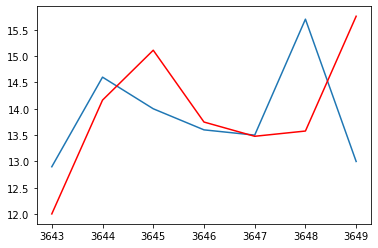

In [9]:
  pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [8]:
from matplotlib import pyplot


In [10]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/Specter/Desktop/resources/Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv', header =0, parse_dates=[0])
df['t']= df['Temp'].shift(1)
df['Resid']= df['Temp']- df['t']
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']
from statsmodels.tsa.ar_model import AR
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    pred_resid = model_fit.predict(start = len(data), end = len(train)+len(test)-1)
    y = model_fit.predict(start = len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0]+pred_resid)
    data = np.append(data, t)
    data = pd.Series(data)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

2.0049858425321743
0.9007669667698304
-0.10790330155538995
-0.4129967255686118
-0.06698282159522283
0.13478963796208945
-0.7612472304688922


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'